# Geocoding with geopandas

## goals of the tutorial
- from string to lat/long
- from lat/lon to string


### requirements
- python knowledge
- geopandas

### status 
*"I'm a geo-soothsayer"*

---

In [ ]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas
  import geopandas as gpd

In [ ]:
!pip install git+https://github.com/python-visualization/folium
import folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-jwagvgm7
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-jwagvgm7
  Created wheel for folium: filename=folium-0.11.0+20.gb70efc6-py2.py3-none-any.whl size=97529 sha256=6f92b85f41620b5721db32cdcfcb8a59bfdbc4cf3fab6510ebc7e5a3f9020530
  Stored in directory: /tmp/pip-ephem-wheel-cache-vyhp9fqs/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium



<div class="alert alert-info" style="font-size:120%">
<b>GEOCODING service</b>
<img src="https://geopy.readthedocs.io/en/stable/_images/logo-wide.png">
the geopandas module is based on geopy
<ul>
    <li>all the goecoders service are available here: <a href="https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders">https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders</a></li>
    <li>NOTE: <a href="https://geopy.readthedocs.io/en/stable/#usage-with-pandas">Attention to the Rate Limit in Pandas</a></li>
</ul>

## choose the right service
![](https://raw.githubusercontent.com/napo/geospatial_bigdive/13bd7078c11c3102b44888efaf04471e80a03e14/img/getlonlat.png)

# geocoding

In [ ]:
cols = ['city']
names = [('Roma'),('Palermo'),('Trento'),('Genova'),('Bari'),('Trieste'),('Napoli'),('Cagliari'),('Messina'),('Lecce')]
cities = gpd.GeoDataFrame(names,columns=cols)

In [ ]:
cities

,city
0,Roma
1,Palermo
2,Trento
3,Genova
4,Bari
5,Trieste
6,Napoli
7,Cagliari
8,Messina
9,Lecce


In [ ]:
%%time
geo_cities = gpd.tools.geocode(cities.city, provider="arcgis")

CPU times: user 64.2 ms, sys: 9.1 ms, total: 73.3 ms
Wall time: 6.12 s


In [ ]:
geo_cities

,geometry,address
0,POINT (12.49565 41.90322),Roma
1,POINT (13.36112 38.12207),Palermo
2,POINT (11.11926 46.07005),Trento
3,POINT (8.93898 44.41039),Genova
4,POINT (16.86666 41.12587),Bari
5,POINT (13.77269 45.65757),Trieste
6,POINT (14.25226 40.84014),Napoli
7,POINT (9.11049 39.21454),Cagliari
8,POINT (15.55308 38.17837),Messina
9,POINT (18.16802 40.35796),Lecce


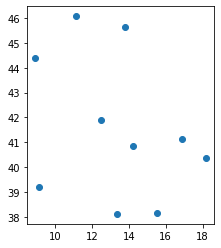

In [ ]:
geo_cities.plot()

# reverse geocoding

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geo_cities

,geometry,address
0,POINT (12.49565 41.90322),Roma
1,POINT (13.36112 38.12207),Palermo
2,POINT (11.11926 46.07005),Trento
3,POINT (8.93898 44.41039),Genova
4,POINT (16.86666 41.12587),Bari
5,POINT (13.77269 45.65757),Trieste
6,POINT (14.25226 40.84014),Napoli
7,POINT (9.11049 39.21454),Cagliari
8,POINT (15.55308 38.17837),Messina
9,POINT (18.16802 40.35796),Lecce


In [ ]:
point = geo_cities.geometry[2]

In [ ]:
point.wkt

'POINT (11.11926000000005 46.07005000000004)'

In [ ]:
point.wkt

'POINT (11.11926000000005 46.07005000000004)'

In [ ]:
type(point.x)

float

In [ ]:
latlon = str(point.y) + "," + str(point.x)

In [ ]:
geolocator = Nominatim(user_agent="Mozilla Firefox")

In [ ]:
location = geolocator.reverse(latlon)

In [ ]:
location.raw

{'address': {'city': 'Trento',
  'country': 'Italia',
  'country_code': 'it',
  'county': 'Provincia di Trento',
  'house_number': '15',
  'municipality': "Territorio Val d'Adige",
  'postcode': '38122',
  'road': 'Via Torre Vanga',
  'state': 'Trentino-Alto Adige/Südtirol',
  'suburb': 'Centro storico Trento',
  'tourism': 'Giovane Europa'},
 'boundingbox': ['46.0700951', '46.0703188', '11.119026', '11.1194422'],
 'display_name': "Giovane Europa, 15, Via Torre Vanga, Centro storico Trento, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38122, Italia",
 'lat': '46.070178',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '11.119240793834841',
 'osm_id': 73293763,
 'osm_type': 'way',
 'place_id': 104813655}

# suggestion for a good geocoding
more details you add and more fortune you have to obtain a good result

In [ ]:
q="Via Verdi, 26"

In [ ]:
point = gpd.tools.geocode(q, provider="arcgis")

In [ ]:
point

,geometry,address
0,POINT (-80.18468 25.83911),Via Verdi


In [ ]:
map_point = folium.Map([point.geometry.y,point.geometry.x], zoom_start=18)
folium.GeoJson(point.to_json()).add_to(map_point)
map_point

add details like city and State

In [ ]:
q="Via Verdi, 26, Trento, Italia"

In [ ]:
point = gpd.tools.geocode(q, provider="arcgis")

In [ ]:
point

,geometry,address
0,POINT (11.11966 46.06665),"Via Giuseppe Verdi 26, 38122, Trento"


In [ ]:
map_point = folium.Map([point.geometry.y,point.geometry.x], zoom_start=18)
folium.GeoJson(point.to_json()).add_to(map_point)
map_point

Try a different geocoder

In [ ]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim")

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
point_nominatim

,geometry,address
0,POINT (10.76813 46.31650),"Via Verdi, Ognano, Stavel, Pellizzano, Comunit..."


In [ ]:
q="Via Giuseppe Verdi, 26, Trento, Italia"

In [ ]:
point_nominatim = gpd.tools.geocode(q, provider="Nominatim")

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
point_nominatim

,geometry,address
0,POINT (11.11971 46.06641),"Dipartimento di Sociologia e Ricerca Sociale, ..."


In [ ]:
map_point = folium.Map([point_nominatim.geometry.y,point.geometry.x], zoom_start=18)
folium.GeoJson(point_nominatim.to_json()).add_to(map_point)
map_point

calculate the difference between the two points

In [ ]:
distance = point.to_crs('epsg:32632').geometry.distance(point_nominatim.geometry.to_crs('epsg:32632')).values[0]

In [ ]:
distance

26.522713658370346